# Lecure 8.2: linear regression and statistics continued

I was going to jump into netcdf files and doing data analysis with them, but decided it was more useful for your work to spend the time on digging in on model fitting. We will come back to netcdf files and climate data in the next two weeks

## Lecture:
    - Root mean square error (RMSE)
    - R^2, the "coefficient of determination"
    - training and testing spitting

### 8.2.1: Continue with what you were doing in Lec 8.1. Focus on the first exercises if you haven't done them yet

### 8.2.2 
Make a pairplot using the housing data: https://scipy-lectures.org/packages/statistics/index.html#pairplot-scatter-matrices

Explain what this tells you

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

# convert the data set into a pandas data frame  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

df["MEDV"] = target["MEDV"] # add the median value from target to new data frame

In [3]:
df.dropna().head() #remove NaN, not sure if this is needed but I did it anyways

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


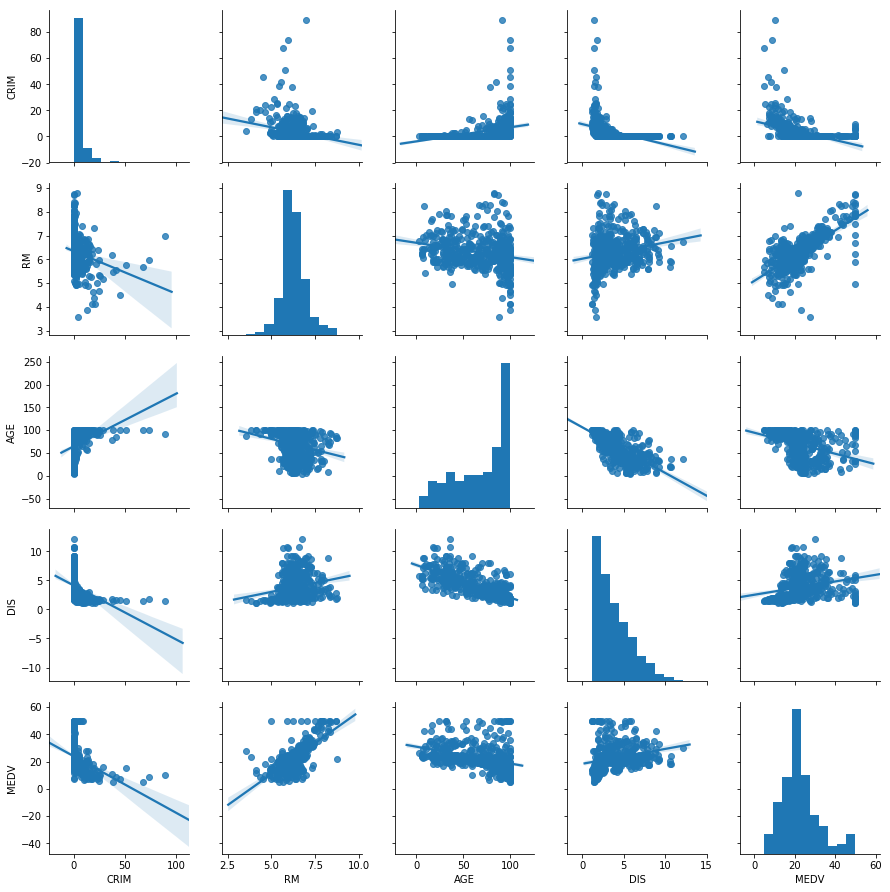

In [4]:
#Make the pair plots
sns.pairplot(df, vars=['CRIM', 'RM', 'AGE', 'DIS', 'MEDV'], kind = 'reg') 

* This figure shows the correlations between each of the selected variables
* The histograms are the distribustions of each inividual variable
* The scatterplots are the two variables plotted against one another
* The line is the linear model

### 8.2.3 Now get creative
Using one or more of the datasets we have been using, ask two or more research questions, make appropriate model(s), and test your model(s) using regression. 
You might pick one easy and one hard research question. You might start with a simple linear model, but feel free to branch out to a non-linear model, or fancy statistics tests if you feel confident about doing so and can explain them. The point is that you are designing the modeling, not following a tutorial, and that you develop expertise on the methods you are using so you can defend their usage.

Places to look for inspiration:
- https://scipy-lectures.org/packages/statistics/index.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
- https://www.statsmodels.org/dev/examples/index.html

etc...


### Homework
As before, you will present your analysis to the class. Put a cleaned up version of your code, suitable for presentation, in a new notebook called HW_8_yourname. You will present this next Tuesday afternoon, after Riley's lecture.

In [94]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [95]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

# convert the data set into a pandas data frame  
df1 = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

df1["MEDV"] = target["MEDV"] # add the median value from target to new data frame

* how strong is the correlation between distance to employment centers and age of the home

In [96]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df1["AGE"],df1["DIS"]) #linear regression using scipy

In [97]:
slope

-0.05594612178624682

In [98]:
intercept

7.631542460966008

In [99]:
r_value # relatively strong negative correlation 

-0.747880540868632

In [100]:
p_value # p-value shows significance 

9.857534072929123e-92

In [101]:
std_err

0.0022119817617867288

Text(0.5,1,'Home Age vs. Location')

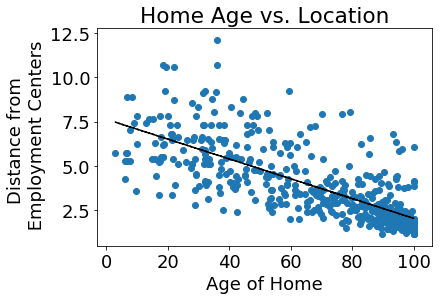

In [102]:
plt.rcParams.update({'font.size': 18})
plt.plot(df1["AGE"], slope*df1["AGE"]+intercept, 'k--')
plt.scatter(df1["AGE"], df1["DIS"])
plt.xlabel('Age of Home')
plt.ylabel('Distance from \n Employment Centers')
plt.title('Home Age vs. Location')

* Do older homes that are close to employment centers have a higher value than newer homes

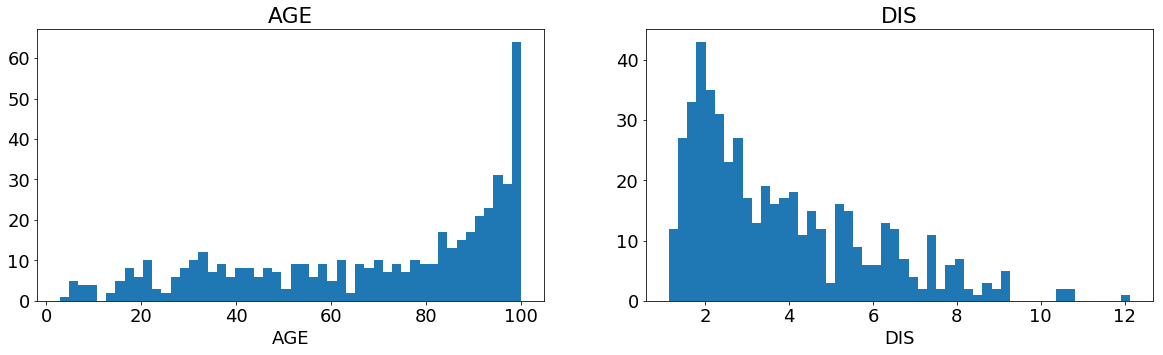

In [103]:
#make histograms of home ages and distances to see the spread of the data
plt.figure(figsize=(20, 5))

features = ['AGE', 'DIS']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1) #this line defines where in the sub plot the fig would go,  
    x = df1[col]                           # if there were variable I think they would all end up on one line
    plt.hist(x, bins = 50)
    plt.title(col)
    plt.xlabel(col)

In [104]:
#df1.dtypes #check data types

In [105]:
#change to int
#df1 = df1.astype(np.int64).head()
#did

In [106]:
#df1.dtypes #check to see that it worked

In [107]:
#convert to pandas df
#df = pd.DataFrame(data=df1)
#### didn't need to do all of that

In [163]:
#Split the data into two groups (old and close)(everything else)
AGE = df1['AGE']
DIS = df1['DIS']
old = df1[AGE >= 74] #filter out all homes that are less than 90 yrs old
old = old[DIS < 3]  #from filtered data, filter oul all homes that with distance more than 2
old..head()

SyntaxError: invalid syntax (<ipython-input-163-31c7ee677796>, line 6)

In [164]:
other = df1[AGE < 74]
other = other[DIS >= 3]
#other = other[DIS < 10.5]
other.head()

C:\Users\emull\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [165]:
# look at shape of the new data frames to determine if they are the same size
old.shape


(210, 14)

In [166]:
other.shape

(210, 14)

In [167]:
slope, intercept, r_value, p_value, std_err = stats.linregress(old["MEDV"],other["MEDV"])
#linear regression between old and everything else

In [168]:
r_value 

0.19520373455967313

In [169]:
p_value

0.004521949701889684

Text(0,0.5,'Median Value of \n New Far Homes')

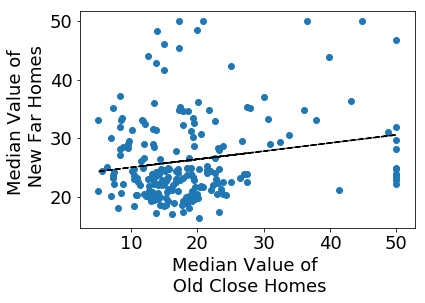

In [189]:
plt.rcParams.update({'font.size': 18})
plt.plot(old["MEDV"], slope*old["MEDV"]+intercept, 'k--')
plt.scatter(old["MEDV"], other["MEDV"])
plt.xlabel('Median Value of \n Old Close Homes')
plt.ylabel('Median Value of \n New Far Homes')
# I don't know why I did a correlation between thos two, that makes no sense 

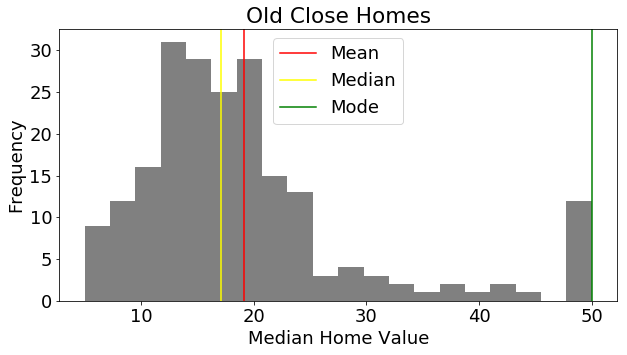

In [185]:
value = old['MEDV']

mean=value.mean()
median=value.median()
mode=value.mode()

plt.figure(figsize=(10,5))
plt.hist(old['MEDV'], bins = 20, color = 'grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')
plt.title('Old Close Homes')
plt.legend()
plt.show()

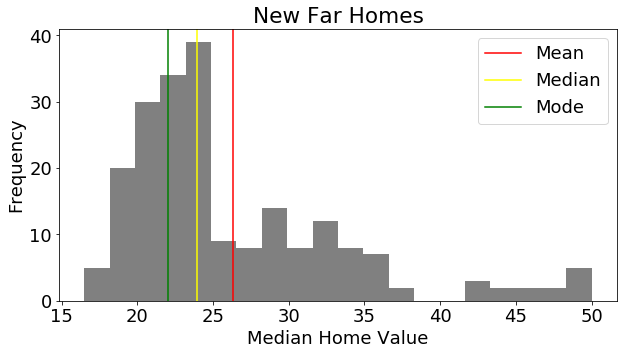

In [186]:
value = other['MEDV']

mean=value.mean()
median=value.median()
mode=value.mode()

plt.figure(figsize=(10,5))
plt.hist(other['MEDV'], bins = 20, color = 'grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')
plt.title('New Far Homes')
plt.legend()
plt.show()

In [ ]:
# do an anova to see if they are different

In [174]:
med_o = old['MEDV']
med_n = other['MEDV']

In [182]:
import scipy.stats as stats
stats.f_oneway(med_o, med_n)

F_onewayResult(statistic=67.77186592669321, pvalue=2.366484034924227e-15)

In [ ]:
#statistic is the F value, F value = variance of the group means 
#(Mean Square Between) / mean of the within group variances (Mean Squared Error))

* It looks like there is a statistically significant differnce between the means of the two groups

# Additional Question: Can you remove NaN's from a single column using df.dropna(col_name)?
     If not, how can you do that?

In [7]:
#look for NaN's use .isna()

In [8]:
file = "movies.xls"
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])


In [9]:
#movies.isna().sum
#tons of NANs

In [10]:
movies.head(1)

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,D.W. Griffith,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0


In [12]:
df1 = movies.dropna('Year')
#no this does not work
#what does work?

ValueError: No axis named Year for object type <class 'type'>

In [11]:
df2 = movies.dropna(subset=['Year'])
df2.isna().sum 
#No longer has NaN's in YEAR!!!!!!!!!!!!!

<bound method DataFrame.sum of                                                     Year  Genres  Language  \
Title                                                                        
Intolerance: Love's Struggle Throughout the Ages   False   False      True   
Over the Hill to the Poorhouse                     False   False      True   
The Big Parade                                     False   False      True   
Metropolis                                         False   False     False   
Pandora's Box                                      False   False     False   
The Broadway Melody                                False   False     False   
Hell's Angels                                      False   False     False   
A Farewell to Arms                                 False   False     False   
42nd Street                                        False   False     False   
She Done Him Wrong                                 False   False     False   
It Happened One Night            